# "Продвинутый Python". Магистерская программа ВШЭ.

## Домашнее задание №1. Марк Любимов.

In [1]:
import time
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

Зачем нужна doc string? Как её посмотерть?

In [2]:
# Bad way

def delete_zeros_from_array(array):
    #     logic for deleting zeroes
    pass

In [3]:
# Not bad way

from functools import partial

def delete_elements_from_array(array, element):
    
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    
    #solution:
    #moving all elements to the end of the array
    #slice removing is less complex than element-wise removing: O(1) vs O(n)
    
    #looking for the first appearance of the element
    elements_exist = False
    for i in range(len(array)):
        if array[i] == element:
            elements_exist = True
            sequence_start = i
            break
    #if elements in array    
    if elements_exist:
        els_in_row = 0
        for i in range(sequence_start + 1, len(array)):

            if array[i] == element:
                els_in_row += 1
            else:
                array[sequence_start], array[i] = array[i], array[sequence_start]
                sequence_start += 1 
        #slice removing
        del array[sequence_start:]
        return array
    #no elements in array
    else:
        return array
    
delete_zeros_from_array = partial(delete_elements_from_array, element=0)

In [4]:
np.random.seed(42)
avg_time = []
list_lenght = [x for x in range(100, 5000, 50)]
for lenght in tqdm(list_lenght):
    tmp_list = []
    for sampling in range(50):
        array = [np.random.randint(0, 6) for n in range(lenght)]
        start_time = time.time()
        c = delete_elements_from_array(array, element=0)
        tmp_list.append(time.time() - start_time)
    avg_time.append(sum(tmp_list) / len(tmp_list))

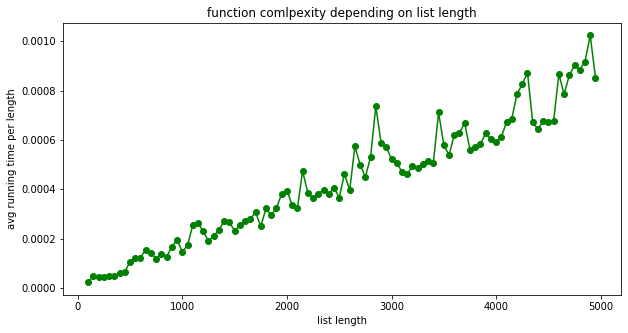

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(list_lenght, avg_time, 'go-')
plt.xlabel('list length')
plt.ylabel('avg running time per length')
plt.title('function comlpexity depending on list length')
plt.show()

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [6]:
def find_min(arr):
    """
    Function than finds complex number with minimum module
    """

    i_min, mod_min = 0, abs(arr[0])
    
    for i in range(1, len(arr)):
        mod_curr = abs(arr[i])
        if mod_curr < mod_min:
            i_min = i
            mod_min = mod_curr
            
    return arr[i_min]

In [7]:
a = complex(5, 1)
b = complex(4, -2)
c = complex(0, 10)

find_min([a, b, c])

(4-2j)

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [8]:
from itertools import permutations
from functools import lru_cache

def parser(card_number):
    """
    Function that splits card number into 4 parts
    """
    card_number_string = str(card_number)
    number_length = len(card_number_string) // 4
    return [int(card_number_string[:number_length]),
            int(card_number_string[number_length: 2*number_length]), 
            int(card_number_string[2*number_length: 3*number_length]), 
            int(card_number_string[3*number_length:])]

@lru_cache()
def fibonacci(n): 
    """
    Fibonacci algorithm
    """
    #Recurrsive algorithm doesnt work for large n, so I chose another approach
    a = 0
    b = 1
    if n < 0: 
        print("Incorrect input") 
    elif n == 0: 
        return a 
    elif n == 1: 
        return b 
    else: 
        for i in range(2, n): 
            c = a + b 
            a, b = b, c 
        return b 
    
def euclid_gcd(a, b):
    """
    Euclid algorithm function
    """
    while b != 0:
        a, b = b, a % b
    return a

def quick_median(array):
    """
    Algorithm of quick median
    """
    if len(array) % 2 == 1:
        return quick_select(array, len(array) / 2)
    else:
        return (quick_select(array, len(array) / 2 - 1) + quick_select(array, len(array) / 2)) / 2

def quick_select(array, k):

    if len(array) == 1:
        return array[0]
    
    pivot = array[len(array) // 2]
    
    pivots = [x for x in array if x == pivot]
    highers = [x for x in array if x > pivot]
    lowers = [x for x in array if x < pivot]
    
    if k < len(lowers):
        return quick_select(lowers, k)
    elif k < len(lowers) + len(pivots):
        return pivots[0]
    else:
        return quick_select(highers, k - len(lowers) - len(pivots))
    
def ATM(card_number: int, password: int):
    """
     ATM function.
        
        :param card_number: Input card number
        :type card_number: int
        :param password: Input password
        :type password: int
        
        :returns: Median of the greatest common divisors of all possible combinations of card_number parts and passwrod 
        :rtype: int
    """
    list_of_numbers = parser(card_number)

    fibonacci_numbers = []
    for n in list_of_numbers:
        fibonacci_numbers.append(str(fibonacci(n)))
        
    list_of_combinations = ["".join(comb) for comb in permutations(fibonacci_numbers)]

    list_of_gcd = []
    for n in list_of_combinations:
        list_of_gcd.append(euclid_gcd(int(n), password))
 
    return quick_median(list_of_gcd)

In [9]:
ATM(87654321, 4356)

3.0

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [10]:
import time
import sys
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
from tqdm import tqdm_notebook as tqdm

In [11]:
def comparison_function(left_append=False, right_append=False):
    
    np.random.seed(42)

    l, d = list(), deque()
    list_time, deque_time = [], []
    list_size, deque_size = [], []

    list_lenght = [x for x in range(100, 5000, 50)]

    for lenght in tqdm(list_lenght):
        curr_sample_time_list = []
        curr_sample_time_deque = []
        
        curr_sample_size_list = []
        curr_sample_size_deque = []
        for sampling in range(50):
            l = list(np.random.randint(0, 6, size=lenght))
            d = deque(np.random.randint(0, 6, size=lenght))
            
            if right_append:

                start_time = time.time()
                l.append(1)
                appending_time = time.time() - start_time
                curr_sample_time_list.append(appending_time)
                curr_sample_size_list.append(sys.getsizeof(l))
                
                start_time = time.time()
                d.append(1)
                appending_time = time.time() - start_time
                curr_sample_time_deque.append(appending_time)
                curr_sample_size_deque.append(sys.getsizeof(d))
                title = 'right appending comlexity depending on array length'
                
            elif left_append:
                
                start_time = time.time()
                l.insert(0, 1)
                appending_time = time.time() - start_time
                curr_sample_time_list.append(appending_time)
                curr_sample_size_list.append(sys.getsizeof(l))
                
                start_time = time.time()
                d.appendleft(1)
                appending_time = time.time() - start_time
                curr_sample_time_deque.append(appending_time)
                curr_sample_size_deque.append(sys.getsizeof(d))
                title = 'left appending comlexity depending on array length'
            
        list_time.append(sum(curr_sample_time_list) / len(curr_sample_time_list))
        deque_time.append(sum(curr_sample_time_deque) / len(curr_sample_time_deque))
        
        list_size.append(sum(curr_sample_size_list) / len(curr_sample_size_list))
        deque_size.append(sum(curr_sample_size_deque) / len(curr_sample_size_deque))
        
    plot_function(list_time, deque_time, list_lenght, title=title, y_label='bytes')
    plot_function(list_size, deque_size, list_lenght, title='memory usage depending on array length', y_label='secs')
    
def plot_function(list_time, deque_time, list_lenght, title='', y_label=''):

    plt.plot(list_lenght, list_time, label='list')
    plt.plot(list_lenght, deque_time, label='deque')
    plt.legend()
    plt.xlabel('length')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

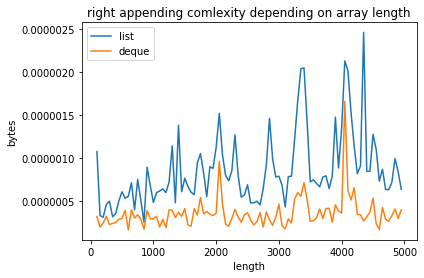

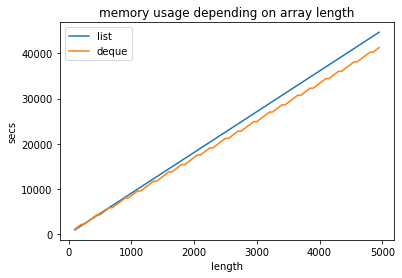

In [12]:
comparison_function(right_append=True)

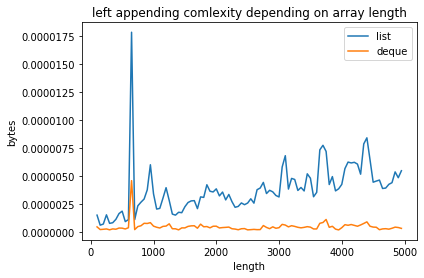

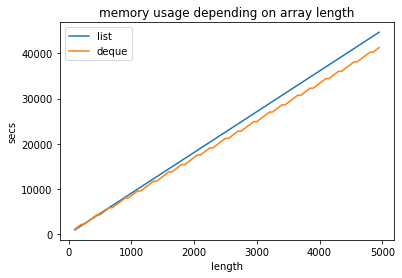

In [13]:
comparison_function(left_append=True)

## Выводы:
* list тратит больше времени на добавление слева или справа чем deque
* list использует в среднем больше памяти чем deque

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количество баллов зависит от полноты сравнения.

In [14]:
def my_permutations(array):
    
    if len(array) <= 1:
        yield array
    else:
        for i in range(len(array)):
            fixed_element = array[i]
            rest_elements = array[:i] + array[i+1:]
            for permutation in my_permutations(rest_elements):
                yield [fixed_element] + permutation

In [16]:
import sys
from itertools import permutations
  
lst = ['a', 'b', 'c', 'd', 'e', 'f']

perm1 = permutations(lst) 
perm2 = my_permutations(lst)

In [17]:
%%timeit
perm1 = permutations(lst) 

544 ns ± 31.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [18]:
%%timeit
list(perm1)

482 ns ± 162 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [19]:
%%timeit
list(perm2)

304 ns ± 13.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [20]:
def comparison_permutations():
    
    np.random.seed(42)
    
    list_time_1, list_time_2 = [], []
    
    list_lenght = [x for x in range(100, 5000, 50)]

    for lenght in tqdm(list_lenght):
        curr_sample_time_perm_1 = []
        curr_sample_time_perm_2 = []
        for sampling in range(50):
            l = [x for x in range(lenght)]
            start_time = time.time()
            perm1 = permutations(lst) 
            curr_sample_time_perm_1.append(time.time() - start_time)
            start_time - time.time()
            perm2 = my_permutations(lst) 
            curr_sample_time_perm_2.append(time.time() - start_time)
        list_time_1.append(sum(curr_sample_time_perm_1) / len(curr_sample_time_perm_1))
        list_time_2.append(sum(curr_sample_time_perm_2) / len(curr_sample_time_perm_2))
        
    
    plt.plot(list_lenght, list_time_1, label='itertools')
    plt.plot(list_lenght, list_time_2, label='custom permutation')
    plt.legend()
    plt.xlabel('length')
    plt.ylabel('time')
    plt.title('itertools vs custom permutation')
    plt.show()

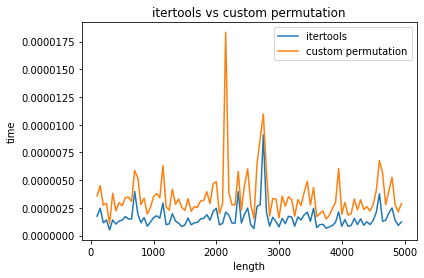

In [21]:
comparison_permutations()

## Вывод:
* сложность кастомной функции получилась чуть больше, чем реализованной в itertools